<a href="https://colab.research.google.com/github/nidhin-koshy/Notebooks/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

The obective in a classification task is to assign class labels to input samples. Prior to the classification task, we train the classifier using training samples, where input samples and it's corresponding labels are provided. 

##System Model

 Let $(x_i,y_i)$ denote  the $i$th (training sample, class label) pair where $x_i $ denotes the training sample and $y_i$ denotes the class label. $x_i$ can be a feature vector and $y_i$ can take one among the finite class labels.
 
 ### Binary Classification
 When $y_i$ takes only two values, we denote the classification task as binary classification.
 
 



In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D






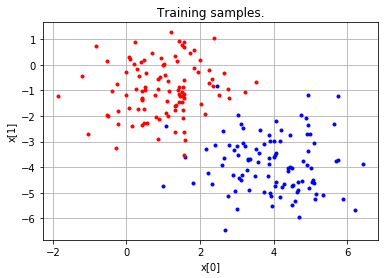

In [31]:
num_x1_samples = 100
num_x2_samples = 100

mu_1 = np.array([[4,-4]]).T
mu_2 = np.array([[1,-1]]).T

x1 = np.random.randn(num_x1_samples,2) + mu_1.T
y1 = np.ones((num_x1_samples,1))

x2 = np.random.randn(num_x2_samples,2) + mu_2.T
y2 = np.zeros((num_x2_samples,1))

x_train = np.concatenate((x1,x2),axis=0)
x_train = np.concatenate((x_train,np.ones((x_train[:,0].size,1))),axis=1)
y_train = np.concatenate((y1,y2),axis=0)

plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.grid()
plt.title("Training samples.")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.show()


### Linear Classifiers
 
 Classifiers of the form 
 
 $$\hat{y} = \begin{cases} 1 & \text{if } \quad h(w,x) > 0 \\ 0 & \text{otherwise} \end{cases} ,$$ where $h(w,x) = w^Tx + b$ is an affine function of the input sample $x$.
 
 ### Logistic Regression
 
 Logistic regression is a linear classifier. Logistic regression can be viewed as a maximum likelihood estimator under specific assumptions. 

Given the parameters of the logistic function $w$, let the likelihood of the class label $Y$ given the input variable $X = x$ be modelled as the logistic function
$$P(Y = 1 | X = x) = \frac{1}{1+e^{-w^Tx}}.$$

Then, given the parameters of the logistic function $w$, the likelihood for a given training sample can be written as
$$P(Y=y_i | X=x_i) =  \left(\frac{1}{1+e^{-w^Tx_i}}\right)^{y_i} \left(\frac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}}\right)^{1-y_i}.$$

The log-likelihood of the entire training samples can then be written as

 \begin{align} \nonumber L(w) &= \sum_{i=1}^n y_i \log \left(\frac{1}{1+e^{-w^Tx_i}}\right) + (1-y_i) \log \left(\frac{e^{-w^Tx_i}}{1+e^{-w^Tx_i}}\right)\\
& = \sum_{i=1}^n y_i w^Tx_i+\log \left(\frac{1}{1+e^{w^Tx_i}}\right).
\end{align}

The obective of the training in logistic regression is to obtain the parameter $w^*$ that maximizes the likelihood, i.e.,

$$w^* = \arg \max_w L(w).$$

There is no closed form expression for the optimum $w^*$. However, given that the objective function is convex in the optimization variable $w$, one can employ convex optimization techniques to obtain $w^*$. Particularly, we can use gradient descent based techniques to find $w^*$. The gradient of the objective function with respect to $w$ can be derived to be

\begin{align}
\nabla_{w}L(w) = \sum_{i=1}^n y_i x_i -  \left(\frac{1}{1+e^{-w^Tx_i}}\right)x_i.
\end{align}

Converged w* =  [[ 1.19952326 -1.15011687 -5.24453739]]


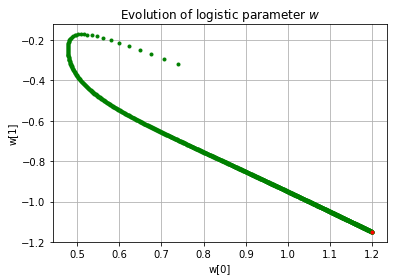

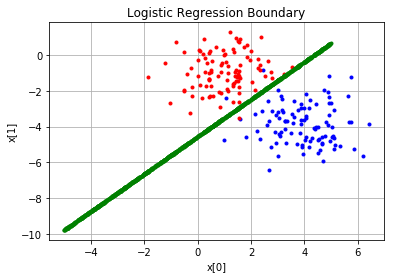

In [32]:
def get_grad(x,y,w):
  wT_x = np.matmul(x,w)
  temp = 1/(1+np.exp(-wT_x))
  grad = np.matmul(x.T,y)-np.matmul(x.T,temp)
  
  grad = grad/(y.size)
  return grad


num_iter = 1000
w = np.random.randn(x_train[0,:].size,1)
w_evol = w
mu= 0.1
for iter_count in range(num_iter):
    grad = get_grad(x_train,y_train,w)
    w = w+mu*grad
    w_evol = np.concatenate((w_evol,w),axis=1)
    
print("Converged w* = ", w.T)
x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w[0,0]+w[2,0])/w[1,0]

plt.figure()
plt.plot(w_evol[0,:],w_evol[1,:],'.g')
plt.plot(w_evol[0,-1:],w_evol[1,-1:],'.r')
plt.title("Evolution of logistic parameter " r"$w$")
plt.xlabel("w[0]")
plt.ylabel("w[1]")
plt.grid()
plt.show()

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

Logistic Regression parameters from sklearn =  [[ 1.09639361 -1.04953547 -4.74493712]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


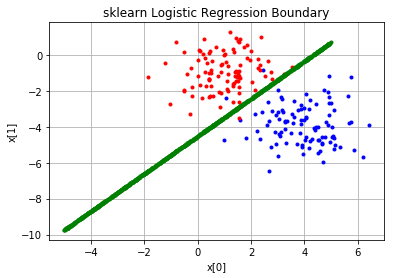

In [33]:
#Logistic Regression using sklearn in-built implementation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train[:,0:2],y_train[:,0]) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
w_sklearn = np.array([np.append(log_reg.coef_,log_reg.intercept_)])

print("Logistic Regression parameters from sklearn = ", w_sklearn)


#x1_plot = 10*np.random.rand(1000,1)-5
x2_plot = -(x1_plot*w_sklearn.T[0,0]+w_sklearn.T[2,0])/w_sklearn.T[1,0]

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("sklearn Logistic Regression Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

### Perceptron

Perceptron is a simple linear classifier based on a very simple neural network model. Perceptron classifier can be modelled as
\begin{align}
\nonumber y &= sign(w^Tx)\\
\nonumber & = sign\left(\sum_{k=1}^K w_kx_k\right),
\end{align}
where $sign(x) = 1$ if $x >0$ and $sign(x) = -1$ if $x \le 0$.

#### Training a perceptron
Perceptron training is done on a sample by sample basis. Whenever the current model encounters an error, the perceptron weights are updated. The weight updation rule in perceptron training for training sample $(x_i,y_i)$ is given by

\begin{align}
\nonumber w = w + \nabla_w,
\end{align}
where 

\begin{align}
\nabla_w = \begin{cases} &2 \eta y_i x_i & \text{if }  {y_i \ne sign(w^Tx_i)} \\ 
& 0 & \text{otherwise}
\end{cases},
\end{align}
where $\eta$ is the learning rate. 

Perceptron weights =  [[ 0.21201418 -0.20060269 -0.88540985]]


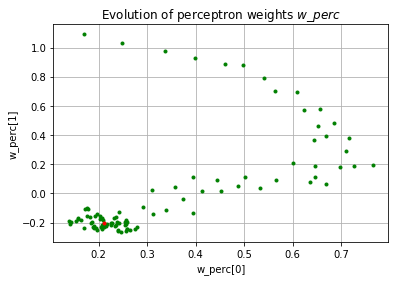

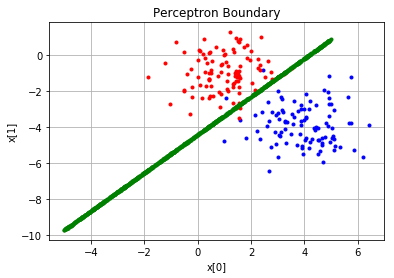

In [34]:
#Perceptron training
#Shuffle training samples. In the logistic regression example, the samples where not randomized
perm = np.random.permutation(y_train.size)

x_train_1 = x_train[perm,:]
y_train_1 = y_train[perm,:]
y_train_1 = 2*y_train_1-1 # relabel zeros by -1


w_perc = np.random.randn(x_train[0,:].size,1)
w_perc_evol = w_perc
eta = 0.01

num_outer_loop = 10
for count_outer_loop in range(num_outer_loop):
  for count_inner in range(y_train.size):
    if (y_train_1[count_inner,0]*np.matmul(x_train_1[count_inner,:],w_perc)) < 0:
      w_perc = w_perc + (2*eta*y_train_1[count_inner,0])*x_train_1[count_inner:count_inner+1,:].T
      w_perc_evol = np.concatenate((w_perc_evol,w_perc),axis=1)
      
print("Perceptron weights = ", w_perc.T)

x2_plot = -(x1_plot*w_perc[0,0]+w_perc[2,0])/w_perc[1,0]
plt.figure()
plt.plot(w_perc_evol[0,:],w_perc_evol[1,:],'.g')
plt.plot(w_perc_evol[0,-1:],w_perc_evol[1,-1:],'.r')
plt.title("Evolution of perceptron weights " r"$w\_perc$")
plt.xlabel("w_perc[0]")
plt.ylabel("w_perc[1]")
plt.grid()
plt.show()

plt.figure()
plt.plot(x1[:,0],x1[:,1],'.b')
plt.plot(x2[:,0],x2[:,1],'.r')
plt.plot(x1_plot,x2_plot,'.g')
plt.title("Perceptron Boundary")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.grid()
plt.show()

    
    

## Exercises
* Create a function that computes the accuracy of a linear classifier.

# Classification using public datasets

* We will try to do a classification task on a publically available dataset.
* First we will use the Indian Liver Disease Dataset avaialble at https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29

In [35]:
# download dataset from source
!rm -rf Indian* # Remove earlier copies of the dataset if any
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
!ls -l

--2019-06-27 08:37:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23755 (23K) [application/x-httpd-php]
Saving to: ‘Indian Liver Patient Dataset (ILPD).csv’

Indian Liver Patien 100%[===================>]  23.20K  --.-KB/s    in 0.03s   

2019-06-27 08:37:45 (773 KB/s) - ‘Indian Liver Patient Dataset (ILPD).csv’ saved [23755/23755]

total 144
-rw-r--r-- 1 root root 44267 Jun 27 08:36  chronic_kidney_disease.arff
-rw-r--r-- 1 root root 47276 Jun 27 08:36  chronic_kidney_disease_full.arff
-rw-r--r-- 1 root root  2924 Jul  4  2015  chronic_kidney_disease.info.txt
-rw-r--r-- 1 root root 19260 Jul  4  2015  Chronic_Kidney_Disease.rar
-rw-r--r-- 1 root root 23755 May 21  2012 'Indian Liver Patient Dataset (ILPD

In [0]:
import numpy as np
import pandas as pd
from scipy.io import arff



In [37]:
df_LD = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None) #load data as a pandas dataframe
df_LD.columns= ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT','TP','ALB','A/G','LD'] #if columns are not spcified in the source file, assign column names
print(df_LD.head()) # display first 5 records
print(df_LD.describe()) # display a summary of the dataset



   Age  Gender    TB   DB  Alkphos  SGPT  SGOT   TP  ALB   A/G  LD
0   65  Female   0.7  0.1      187    16    18  6.8  3.3  0.90   1
1   62    Male  10.9  5.5      699    64   100  7.5  3.2  0.74   1
2   62    Male   7.3  4.1      490    60    68  7.0  3.3  0.89   1
3   58    Male   1.0  0.4      182    14    20  6.8  3.4  1.00   1
4   72    Male   3.9  2.0      195    27    59  7.3  2.4  0.40   1
              Age          TB          DB  ...         ALB         A/G          LD
count  583.000000  583.000000  583.000000  ...  583.000000  579.000000  583.000000
mean    44.746141    3.298799    1.486106  ...    3.141852    0.947064    1.286449
std     16.189833    6.209522    2.808498  ...    0.795519    0.319592    0.452490
min      4.000000    0.400000    0.100000  ...    0.900000    0.300000    1.000000
25%     33.000000    0.800000    0.200000  ...    2.600000    0.700000    1.000000
50%     45.000000    1.000000    0.300000  ...    3.100000    0.930000    1.000000
75%     58.000000

In [38]:
df_LD=df_LD[['Age', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT','TP','ALB','A/G','LD']] # remove the gender columns for the timebeing

print(df_LD.mean()) # display the mean across different columns
print(df_LD.isna().any()) # display if any column have nan values

df_LD = df_LD.fillna(df_LD.mean()) # replace nan with mean values. One could replace it with 0, mean or any other value. One could even remove records have missing values
print(df_LD.isna().any()) # display if any column have nan values

df_LD = df_LD.apply(pd.to_numeric,errors='coerce') #convert all entries to numeric values



Age         44.746141
TB           3.298799
DB           1.486106
Alkphos    290.576329
SGPT        80.713551
SGOT       109.910806
TP           6.483190
ALB          3.141852
A/G          0.947064
LD           1.286449
dtype: float64
Age        False
TB         False
DB         False
Alkphos    False
SGPT       False
SGOT       False
TP         False
ALB        False
A/G         True
LD         False
dtype: bool
Age        False
TB         False
DB         False
Alkphos    False
SGPT       False
SGOT       False
TP         False
ALB        False
A/G        False
LD         False
dtype: bool


In [39]:
data_array = df_LD.to_numpy() # convert pandas dataframe to a numpy array
x_data = data_array[:,[0,2,3,4,5,6,7,8]] #
y_data = data_array[:,9]

print(np.argwhere(np.isnan(x_data)))
print(np.argwhere(np.isnan(y_data)))


from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=42)

classifier = RandomForestClassifier()
classifier.fit(x_train,y_train) #y_train[:,0] used only because fit() expects the labels to be a 1d array and not a column vector.
#w_sklearn = np.array([np.append(classifier.coef_,classifier.intercept_)])
#print("Classification coefficients", w_sklearn)

print("Classification score = ", classifier.score(x_test,y_test))

[]
[]
Classification score =  0.7371428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
